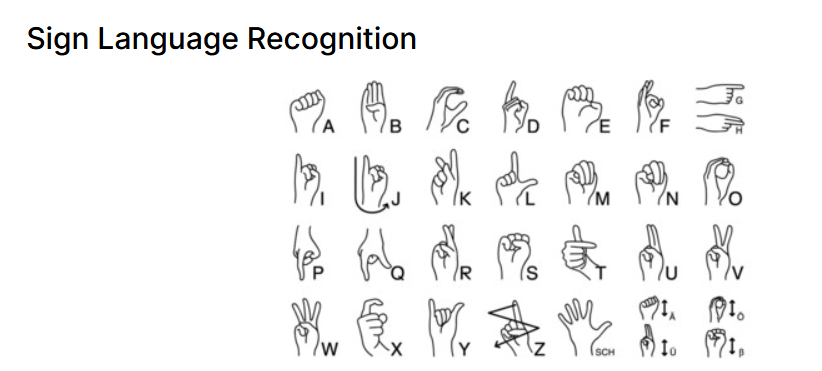

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")       
plt.style.use('fivethirtyeight') 

In [2]:
df_train=pd.read_csv("C:\\Users\\harsha k\\Desktop\\Sign Language Recognition\\TrainData.csv\\TrainData.csv")
df_test=pd.read_csv("C:\\Users\\harsha k\\Desktop\\Sign Language Recognition\\TestData.csv\\TestData.csv")

In [4]:
df_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [5]:
df_test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,253,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [11]:
test_label=df_test['label']
X_test=df_test.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()


(4267, 784)


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,253,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [6]:
df_train['label'].value_counts().sort_index()

0     464
1     468
2     473
3     469
4     466
5     468
6     498
7     462
8     495
9     471
10    500
11    492
12    465
13    495
14    490
15    501
16    465
17    464
18    473
19    465
20    467
21    462
22    495
23    471
24    461
25    474
26    470
Name: label, dtype: int64

In [7]:
df_train.isna().sum() >0

pixel_0      False
pixel_1      False
pixel_2      False
pixel_3      False
pixel_4      False
             ...  
pixel_780    False
pixel_781    False
pixel_782    False
pixel_783    False
label        False
Length: 785, dtype: bool

In [8]:
x=df_train.drop('label', axis=1)
y=df_train['label']
test_label=df_test['label']



In [9]:
X=x.values
X

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int64)

In [10]:
label=np.array(y)
label

array([ 0,  0,  0, ..., 26, 26, 26], dtype=int64)

In [13]:
base={0:'0',1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J',11:'K',12:'L',13:'M',14:'N',
      15:'O',16:'P',17:'Q',18:'R',19:'S',20:'T',21:'U',22:'V',23:'W',24:'X',25:'Y',26:'Z'}

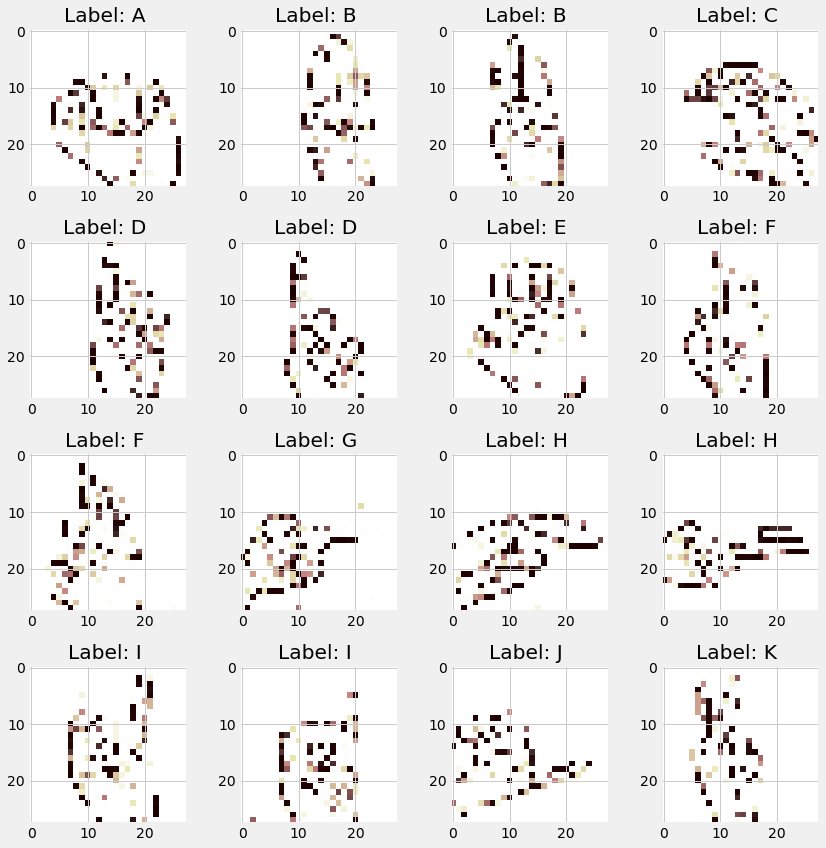

In [27]:
f, mx= plt.subplots(4,4,figsize=(12,12))
k=800
for i in range(4):
    for j in range(4):
        mx[i,j].set_title("Label: {} ".format(base[label[k]]))
        mx[i,j].imshow(X[k].reshape(28,28),cmap='pink')
        k+=300
        
plt.tight_layout()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9633, 784)
(3211, 784)
(9633,)
(3211,)


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
svc_model=SVC()
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
y_pred_train=svc_model.predict(x_train)

In [18]:
print("Test : \n")
print("Accuracy score : \n",accuracy_score(y_test,y_pred))
print("classification_report : \n",classification_report(y_test,y_pred))
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred))

print("Train : \n")
print("Accuracy score : \n",accuracy_score(y_train,y_pred_train))
print("classification_report : \n",classification_report(y_train,y_pred_train))
print("confusion_matrix : \n",confusion_matrix(y_train,y_pred_train))

Test : 

Accuracy score : 
 0.9906571161631891
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       0.99      1.00      1.00       108
           2       0.99      0.98      0.99       110
           3       1.00      1.00      1.00       103
           4       0.99      0.98      0.99       129
           5       1.00      1.00      1.00       114
           6       0.99      0.99      0.99       126
           7       0.99      0.99      0.99       120
           8       0.99      0.99      0.99       146
           9       1.00      1.00      1.00       128
          10       1.00      0.99      1.00       123
          11       0.99      0.96      0.97       120
          12       1.00      1.00      1.00       122
          13       0.99      1.00      1.00       131
          14       1.00      1.00      1.00       124
          15       1.00      0.99      1.00       122
        

In [19]:
predict=svc_model.predict(X_test)
predict

array([ 0,  0,  0, ..., 26, 26, 26], dtype=int64)

In [20]:
x_test=X_test.values
x_test

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int64)

Predicted: 5


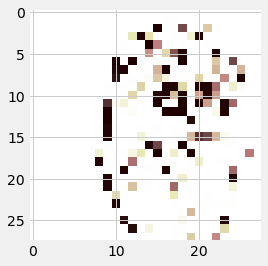

In [21]:
print("Predicted: {}".format(predict[800]))
plt.imshow(x_test[800].reshape(28,28),cmap='pink')

In [22]:
actual=df_test['label'].values
actual

array([ 0,  0,  0, ..., 26, 26, 26], dtype=int64)

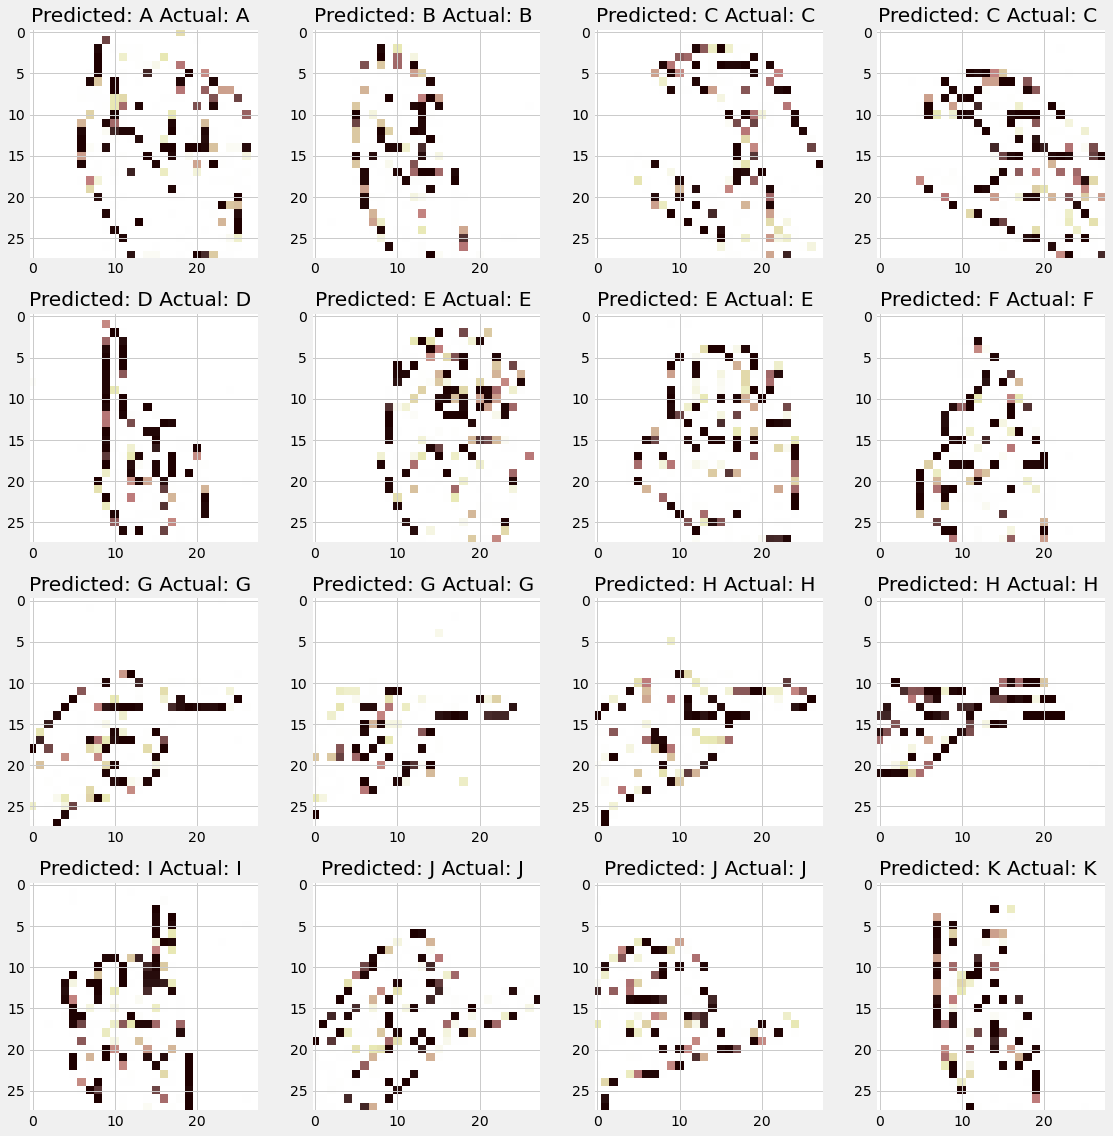

In [29]:
f, mx= plt.subplots(4,4,figsize=(16,16))
k=300
for i in range(4):
    for j in range(4):
        mx[i,j].set_title("Predicted: {} Actual: {} ".format(base[predict[k]],base[actual[k]]))
        mx[i,j].imshow(x_test[k].reshape(28,28),cmap='pink')
        k+=100
        
plt.tight_layout()